<h1 style="color:blue; text-align:center;""> Lecture 23 </h1>
<hr style="height:5px;border-width:0;color:blue;background-color:blue">

# Logistic Regression - Multiclass Classification

In [4]:
from random import random
from random import randint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
# from mlxtend.plotting import plot_decision_regions

In [9]:
#!pip install mlxtend

In [6]:
from mlxtend.plotting import plot_decision_regions

Natively, Logistic Regression only supports binary classification, which is easy to understand due to the nature of the curve obtained from the logistic equation. However, there are two options to “adapt” this model to multi-class problems.

- One-vs-Rest:
    
With the one-vs-rest (“ovr”) option, what our model will do is to compare one class against all other classes, and perform this step for all classes. This way, we transform the multi-class problem into a multi-binary problem.

- Multinomial Logistic Regression:

The other way is to use multinomial logistic regression which is nothing but logit function applied to mulinomial (having multiple terms/columns/features) linear regression. i.e. y = m1x1 + m2x2 + m3x3 + b


- Scikit-Learn has Logistic Regression for multiple classes with default settings with Multinomial selection.
- For OVR setting, we need to put it exclusively as paramenter value: multi_class='ovr'

### Data Creation

In [8]:
#Creating values for FeNO with 3 classes:
FeNO_0 = np.random.normal(15,20, 100)
FeNO_1 = np.random.normal(35,20, 100)
FeNO_2 = np.random.normal(65, 20, 100)

#Creating values for FEV1 with 3 classes:
FEV1_0 = np.random.normal(4.50, 1, 100)
FEV1_1 = np.random.normal(3.75, 1.2, 100)
FEV1_2 = np.random.normal(2.35, 1.2, 100)

#Creating values for Broncho Dilation with 3 classes:
BD_0 = np.random.normal(150,49, 100)
BD_1 = np.random.normal(250,50,100)
BD_2 = np.random.normal(350, 50, 100)

#Creating labels variable with three classes:(2)disease (1)possible disease (0)no disease:
not_asthma = np.zeros((100,), dtype=int)
poss_asthma = np.ones((100,), dtype=int)
asthma = np.full((100,), 2, dtype=int)

In [10]:
# Concatenate variables and create a DataFrame:

In [11]:
#Concatenate classes into one variable:
FeNO = np.concatenate([FeNO_0, FeNO_1, FeNO_2])
FEV1 = np.concatenate([FEV1_0, FEV1_1, FEV1_2])
BD = np.concatenate([BD_0, BD_1, BD_2])
dx = np.concatenate([not_asthma, poss_asthma, asthma])#Create DataFrame:
df = pd.DataFrame()#Add variables to DataFrame:
df['FeNO'] = FeNO.tolist()
df['FEV1'] = FEV1.tolist()
df['BD'] = BD.tolist()
df['dx'] = dx.tolist()

In [13]:
df.head()

,FeNO,FEV1,BD,dx
0,28.666576,5.362379,196.963691,0
1,4.484778,4.929739,158.868079,0
2,-7.135833,4.932383,139.818432,0
3,51.997773,3.882038,86.457346,0
4,12.384455,4.454478,152.573277,0


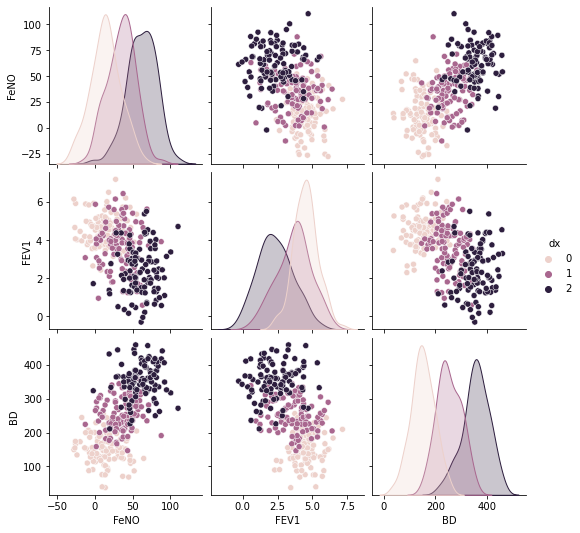

In [14]:
#Exploring dataset:
sns.pairplot(df, kind="scatter", hue="dx")
plt.show()

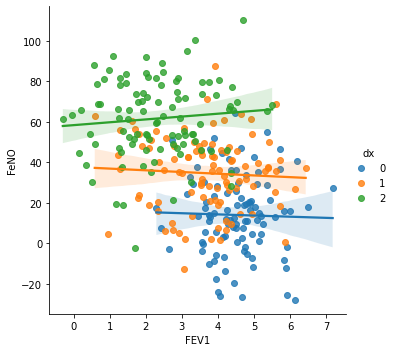

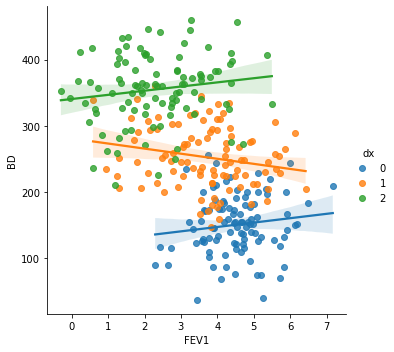

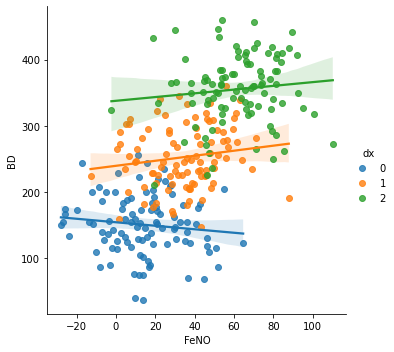

In [15]:
sns.lmplot(x="FEV1", y="FeNO", data=df, fit_reg=True, hue='dx', legend=True)
sns.lmplot(x="FEV1", y="BD", data=df, fit_reg=True, hue='dx', legend=True)
sns.lmplot(x="FeNO", y="BD", data=df, fit_reg=True, hue='dx', legend=True)

t is not entirely clear, but so far, and by visual inspection, the variables “FeNO” and “BD” seem to be best to differentiate between the three groups. We don’t need to know this before analysis, and it will be useful in a following step when we build the decision boundaries graph.

In [16]:
#Creating X and y:
X = df.drop('dx', axis=1)
y = df['dx']

In [ ]:
# train & test

In [41]:
#Fit Logistic Regression model:
logisticregression = LogisticRegression(multi_class='multinomial', max_iter=200).fit(X, y)

In [42]:
print("score: %f" % logisticregression.score(X, y))

score: 0.856667


In [45]:
#Fit Logistic Regression model:
logisticregression = LogisticRegression(C=1, multi_class='ovr', max_iter=100).fit(X, y)

In [46]:
print("score: %f" % logisticregression.score(X, y))

score: 0.853333


#### Boundary Visualization

In [32]:
def logisticReg_comparison(data,c):
    x = data[['BD','FeNO',]].values
    y = data['dx'].astype(int).values
    LogReg = LogisticRegression(C=c, multi_class='multinomial',
                                                      max_iter=1000)
    LogReg.fit(x,y)
    print(LogReg.score(x,y))
    #Plot decision region:
    plot_decision_regions(x,y, clf=LogReg, legend=1)
    #Adding axes annotations:
    plt.xlabel('X_train')
    plt.ylabel('y_train')
    plt.title('LogReg with C='+str(c))
    plt.show()

0.8366666666666667


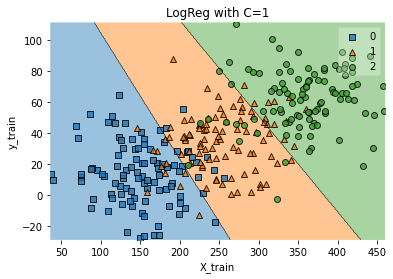

In [33]:
logisticReg_comparison(df,1)

In [36]:
def logisticReg_comparison(data,c):
    x = data[['BD','FeNO',]].values
    y = data['dx'].astype(int).values
    LogReg = LogisticRegression(C=c, multi_class='ovr',
                                               max_iter=1000)
    LogReg.fit(x,y)
    print(LogReg.score(x,y))
    #Plot decision region:
    plot_decision_regions(x,y, clf=LogReg, legend=1)
    #Adding axes annotations:
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('LogReg with C='+str(c))
    plt.show()

0.82


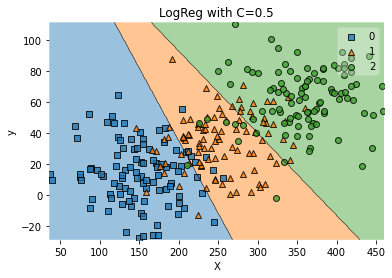

In [37]:
logisticReg_comparison(df,0.5)